In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from sentence_transformers import SentenceTransformer
from numba import jit
from sklearn.manifold import TSNE

/Users/omkaar/Desktop/Projects/patent-semantic-search/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [4]:
sentences = [
    "An arrangement for determining a degree of stretching of hair is provided. The arrangement includes a detection unit for detecting hair characteristics and an evaluation unit for evaluating the detected hair characteristics and for determining the degree of elongation of hair based on the detected hair characteristics. The detection unit contains a near-infrared sensor, and is configured to irradiate a hair sample with electromagnetic waves in the infrared range and to detect an absorbance of the hair sample in a wavelength range from about 800 to about 2500 nm. The acquisition unit is configured to generate an absorption spectrum of the hair sample in the wavelength range of from about 800 to about 2500 nm and provide it to the evaluation unit and the evaluation unit is configured to compare the generated absorption spectrum with a calibration model and to determine a degree of elongation of the hair sample.",
    "A device and method for predictably and controlling the collapsing of a collapsible and expandable stent for subsequent translation through a delivery sheath lumen to an anatomical target such as a heart valve or intravascular location for expansion and implantation. The loading device defines in inner lumen comprising a successively decreasing, from the proximal to the distal direction, inner diameter to a region of constant inner diameter wherein the stent is in a collapsed configuration. The device and method may provide for an at least partially collapsed configuration of the stent that may be further collapsed as a part of the implantation procedure and may comprise a stent that is pre-loaded for future use."
    "A support template for moulds for sports helmets, in particular cycling helmets, provided with at least one frame includes: at least one support portion, placed on a first side of the frame, for the support of at least one component of a helmet to be obtained by a moulding or co-moulding process, the support portion being configured to keep the respective component of the helmet to be obtained according to a predetermined position inside a respective mould; at least one centring portion placed on the first side of the frame and arranged to engage a respective centring seat made on the respective mould so as to ensure the alignment of the latter with the support template and keep the centred positioning of the component of the helmet according to a predetermined configuration; and at least one grip portion to allow manual engagement of the support template by an operator.",
    "A nonlimiting example method for synthesizing a pigment-pendent polyamide (PP-polyamide) may comprise: functionalizing metal oxide particles bound to a pigment particle with a compound having an epoxy to produce a surface treated pigment having a pendent epoxy; and reacting the pendent epoxy with a polyamide to yield the PP-polyamide. Another nonlimiting example method for synthesizing a PP-polyamide may comprise: functionalizing metal oxide particles bound to a pigment particle with a silica particle having a carboxylic acid surface treatment to produce a surface treated pigment having a pendent carboxylic acid; converting the pendent carboxylic acid to a pendent acid chloride; and reacting the pendent acid chloride with a polyamide to yield the PP-polyamide. Said PP-polyamide may be useful in producing objects by methods that include melt extrusion, injection molding, compression molding, melt spinning, melt emulsification, spray drying, cryogenic milling, freeze drying polymer dispersions, and precipitation of polymer dispersions.",
    "A system for automatic in-situ gas lifting of fluid in a multilateral well may include a plurality of downhole sensors arranged to periodically capture pressure data associated with the multilateral well is disclosed. The system may include a processor operatively connected to the downhole sensors and configured to dynamically determine a pressure gradient value associated with the multilateral well based on the periodically captured pressure data. The system may include a first inflow control valve (ICV) operatively connected to the processor and placed within a first lateral to automatically control a flow of a gas from a downhole natural gas source into the multilateral well based on the dynamically determined pressure gradient, and to cause a lift of the fluid received from a second lateral within the well when the ICV is open.",
    "A grid distribution system aggregates energy resources of multiple distributed energy resources (DERs) and provides service to one or more energy markets with the DERs as a single market resource. The DERs can create data to indicate realtime local demand and local energy capacity of the DERs. Based on DER information and realtime market information, the system can compute how to provide one or more services to the power grid based on an aggregation of DER energy capacity.",
    "Methods, systems, apparatuses, and non-transitory computer-readable media are provided for tying virtual whiteboards to physical spaces. In one implementation, the computer-readable medium includes instructions to cause a processor to receive wirelessly, an indication of a location of a first wearable extended reality appliance; perform a lookup to determine that the location of the first wearable extended reality appliance corresponds to a location of a particular virtual whiteboard; transmit to the first wearable extended reality appliance, data corresponding to content of the particular virtual whiteboard; receive, during a first time period, virtual content added by a first user; receive wirelessly at a second time period an indication that a second wearable extended reality appliance is in the location of the particular virtual whiteboard; and transmit to the second wearable extended reality appliance, data corresponding to the content and the added content of the particular virtual whiteboard.",
    "The present disclosure is directed to use of surfactant with fish gelatin based, freeze dried orally disintegrating tablets. Specifically, Applicants discovered that a small amount of surfactant in combination with high molecular weight fish gelatin in a pharmaceutical formulation can ensure good solution/suspension flow into preformed molds during dosing in order that the finished dosage form has an acceptable shape.",
    "A stroke-volume adjustable axial piston pump control valve includes a valve slide arranged in an axially displaceable manner in a housing of the control valve to optionally connect a feed pressure channel, which can be connected to a tank and is arranged and/or formed in the housing, to a control pressure channel, which can be connected to a control pressure chamber of the pump and is arranged and/or formed in the housing. The control valve and/or adjoining components are protected from contamination by a cap filter arranged substantially perpendicularly to a main outer surface of the housing formed substantially in one plane in a blind bore of the housing, and the control pressure channel opens into the main outer surface of the housing at an angle such that the control pressure channel penetrates the blind bore in a mouth region of the control pressure channel adjoining the main outer surface.",
    "Vehicles and methods described herein include a vehicle that operates with a rider according to an operating parameter. The vehicle includes: a physiological monitoring sensor configured to measure a physiological parameter of the rider; an experience hybrid neural network trained on outcomes related to a rider in-vehicle experience associated with the physiological parameter to determine an emotional state of the rider; an augmented reality system configured to present augmented reality content to the rider of the vehicle based, at least in part, on the operating parameter; and an optimization hybrid neural network that identifies a variation in the operating parameter to change the emotional state of the rider and that generates a command to vary the operating parameter and the augmented reality content according to the variation.",
    "This application describes an hardware acceleration design for improving SpGEMM efficiency. An exemplary method may include: obtaining a first sparse matrix and a second sparse matrix for performing SpGEMM; allocating a pair of buffers respectively pointed by a first pointer and a second pointer; for each first row in the first sparse matrix that comprises a plurality of non-zero elements, identifying a plurality of second rows in the second sparse matrix that correspond to the plurality of non-zero elements; obtaining a plurality of intermediate lists computed based on each of the plurality of non-zero elements in the first row and one of the plurality of second rows that corresponds to the non-zero element; performing accumulation of the intermediate lists using the pair of buffers; and migrating the one final merged list to a system memory as a row of an output matrix of the SpGEMM.",
    "The present disclosure provides a RFID terminal and a method of using the same. The RFID terminal includes: a directional antenna module configured to directionally receive a signal transmitted by an electronic tag on an item in a region to be read; a camera configured to collect an image of the region to be read; and a control unit configured to screen information of a target item according to the image of the region to be read captured by the camera.",
    "A computer-implemented method for determining a skill rating of a contractor comprises receiving experience data and training data; determining whether there is any training data; if there is no training data, then determining the skill rating as a maximum value of the skill rating times a constant; if there is some training data, then determining a plurality of evaluation scores, determining a plurality of category evaluation scores, determining a plurality of filtered category evaluation scores, determining an experience total score as a sum of the filtered category evaluation scores, determining an experience factor using the experience total score as an input, and determining the skill rating as a product of the maximum value of the skill rating and the experience factor.",
    "The present invention relates to: a method for providing a digital currency platform service premised on an environment in which digital currency, including a central bank digital currency (CBDC), can freely circulate; and a system for same. Specifically, the present invention relates to providing a trading environment so that users can use various financial services by using digital currency, and relates to: a method for providing a platform service for supporting users so that the users can experience better convenience and security when using digital currency; and a system for same.",
]

embeddings = model.encode(sentences)

emb_flat = embeddings.flatten()

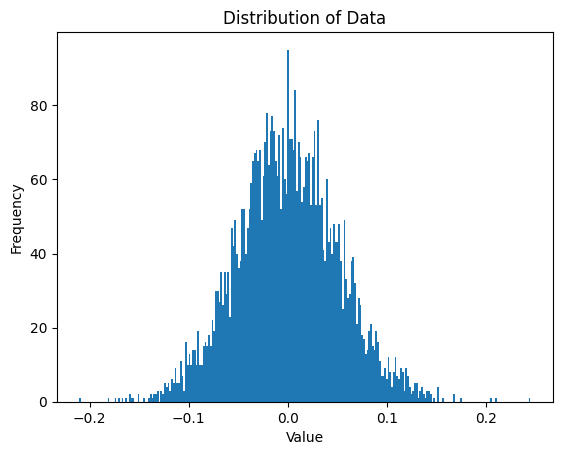

In [5]:
plt.hist(emb_flat, bins=256)
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [6]:
def quantize_embeddings(emb):
    normalized_embedding = (emb - np.mean(emb)) / np.std(emb)
    clipped_embedding = np.clip(normalized_embedding, -3, 3)
    scaled_embedding = 255 * (clipped_embedding) / 6
    quantized_embedding = np.round(scaled_embedding).astype(np.int8)
    return quantized_embedding

quantized_embeddings = np.array([quantize_embeddings(emb) for emb in embeddings])

In [7]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def quantize_embeddings(emb):
    normalized_embedding = (emb - np.mean(emb)) / np.std(emb)
    clipped_embedding = np.clip(normalized_embedding, -3, 3)
    scaled_embedding = 255 * (clipped_embedding) / 6
    quantized_embedding = np.round(scaled_embedding).astype(np.int8)
    return quantized_embedding

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.perf_counter()
quantize_embeddings(embeddings)
end = time.perf_counter()
print("Elapsed (with compilation) = {}s".format((end - start)))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.perf_counter()
quantize_embeddings(embeddings)
end = time.perf_counter()
print("Elapsed (after compilation) = {}s".format((end - start)))

Elapsed (with compilation) = 1.4271998329999889s
Elapsed (after compilation) = 0.00019587500000284308s


[t-SNE] Computing 12 nearest neighbors...
[t-SNE] Indexed 13 samples in 0.000s...
[t-SNE] Computed neighbors for 13 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 13 / 13
[t-SNE] Mean sigma: 0.310027


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/omkaar/Desktop/Projects/patent-semantic-search/.venv/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.010567
[t-SNE] KL divergence after 300 iterations: 0.971040


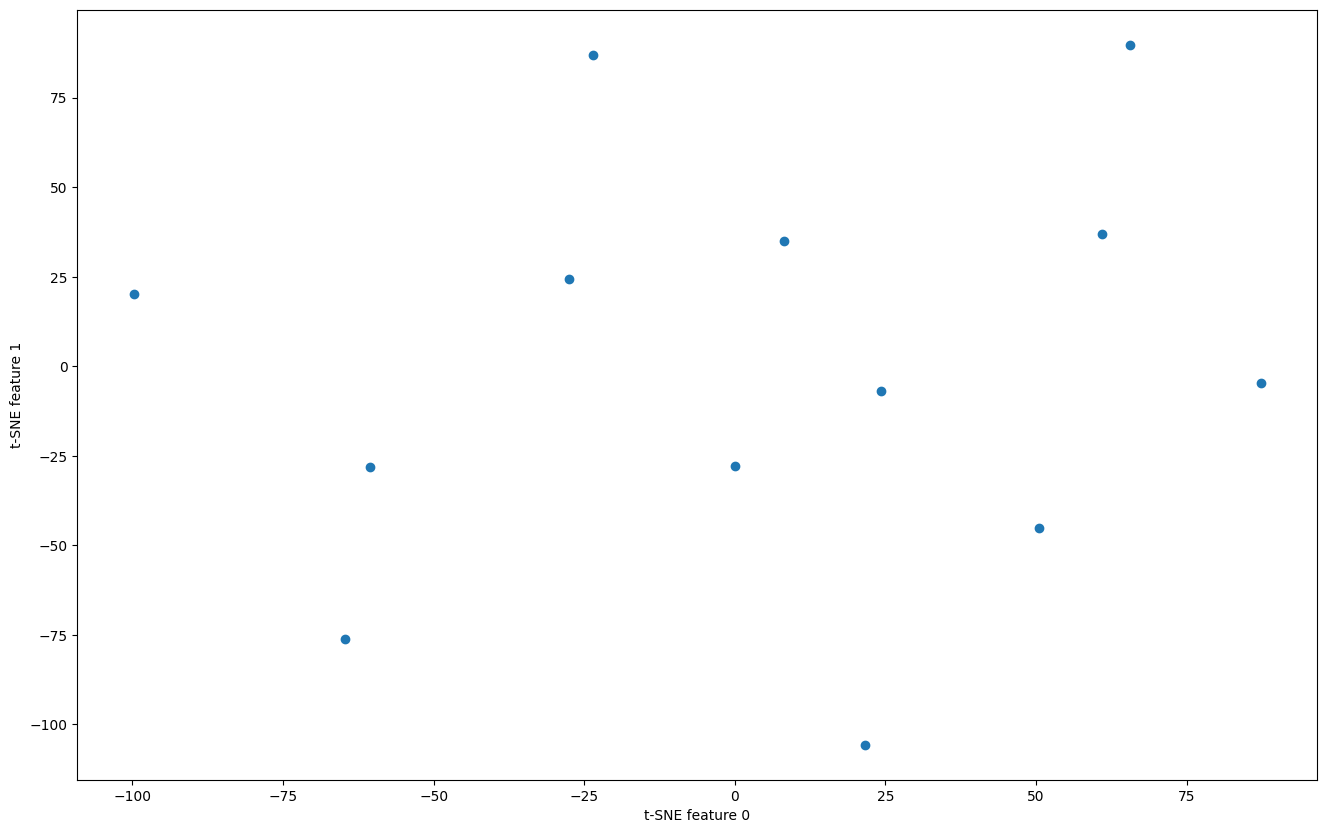

: 

In [9]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')
plt.show()